# Script for fitting N14 from pulsed odmr

In [1]:
import pylab as pb
import time

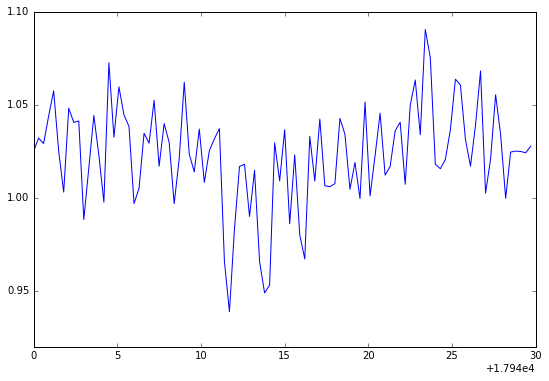

In [2]:
pb.plot(pulsedmeasurement.signal_plot_x, pulsedmeasurement.signal_plot_y)
pb.show()

In [3]:
# multiply the x axis with whatever scaling factor you have

freqs = pulsedmeasurement.signal_plot_x * 10**6
norm_vals = pulsedmeasurement.signal_plot_y

In [4]:
results = fitlogic.make_N14_fit(axis=freqs, data=norm_vals)

In [5]:
mod, params = fitlogic.make_multiplelorentzian_model(no_of_lor=3)

In [6]:
type(mod)

<class 'lmfit.model.CompositeModel'>

In [7]:
results.params.pretty_print()

Name                   Value      Min      Max   Stderr     Vary     Expr
c                      1.031     -inf      inf 0.002403     True     None
lorentz0_amplitude  -9.092e+04     -inf   -1e-06 1.935e+04     True     None
lorentz0_center     1.795e+10     -inf      inf 5.496e+04     True     None
lorentz0_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04     True     None
lorentz1_amplitude  -9.618e+04     -inf   -1e-06 1.907e+04     True     None
lorentz1_center     1.795e+10     -inf      inf 5.496e+04    False lorentz0_center+2.15*1e6
lorentz1_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04    False lorentz0_sigma
lorentz2_amplitude  -6.129e+04     -inf   -1e-06 1.772e+04     True     None
lorentz2_center     1.796e+10     -inf      inf 5.496e+04    False lorentz0_center+4.3*1e6
lorentz2_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04    False lorentz0_sigma


In [8]:
# values of the center peaks
results.params['lorentz0_center'].value, results.params['lorentz1_center'].value, results.params['lorentz2_center'].value

(17951708743.68941, 17953858743.68941, 17956008743.68941)

In [9]:
results.params.pretty_print()

Name                   Value      Min      Max   Stderr     Vary     Expr
c                      1.031     -inf      inf 0.002403     True     None
lorentz0_amplitude  -9.092e+04     -inf   -1e-06 1.935e+04     True     None
lorentz0_center     1.795e+10     -inf      inf 5.496e+04     True     None
lorentz0_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04     True     None
lorentz1_amplitude  -9.618e+04     -inf   -1e-06 1.907e+04     True     None
lorentz1_center     1.795e+10     -inf      inf 5.496e+04    False lorentz0_center+2.15*1e6
lorentz1_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04    False lorentz0_sigma
lorentz2_amplitude  -6.129e+04     -inf   -1e-06 1.772e+04     True     None
lorentz2_center     1.796e+10     -inf      inf 5.496e+04    False lorentz0_center+4.3*1e6
lorentz2_sigma      3.258e+05  7.5e+04 2.97e+07 6.619e+04    False lorentz0_sigma


In [10]:
a0 = results.params['c'] + results.params['lorentz0_amplitude']/(results.params['lorentz0_sigma'] * np.pi)
a1 = results.params['c'] + results.params['lorentz1_amplitude']/(results.params['lorentz1_sigma'] * np.pi)
a2 = results.params['c'] + results.params['lorentz2_amplitude']/(results.params['lorentz2_sigma'] * np.pi)

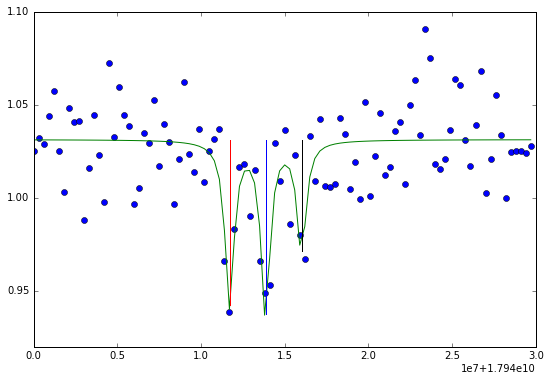

In [11]:
pb.plot(freqs, pulsedmeasurement.signal_plot_y, 'o')
pb.plot(freqs, results.eval())
pb.plot([results.params['lorentz0_center'].value, results.params['lorentz0_center'].value], [a0, results.params['c'].value], 'r')
pb.plot([results.params['lorentz1_center'].value, results.params['lorentz1_center'].value], [a1, results.params['c'].value], 'b')
pb.plot([results.params['lorentz2_center'].value, results.params['lorentz2_center'].value], [a2, results.params['c'].value], 'k')
pb.show()

In [12]:
# calculate sum of contrast 
c0 = (results.params['c'].value - a0) / results.params['c']
c1 = (results.params['c'].value - a1) / results.params['c']
c2 = (results.params['c'].value - a2) / results.params['c']
c0, c1, c2

(0.08611664665094203, 0.09109838726776659, 0.05805026316111551)

In [ ]:
# summed contrasts
c0 + c1 + c2

In [ ]:
results.params['c'].value

In [ ]:
results.params['c'] + results.params['lorentz0_amplitude']/(results.params['lorentz0_sigma'] * np.pi)